## ALY 6140 Capstone Project ~ Jennifer Bousquet

For the Capstone assignment, I chose to download a dataset including 120 years of Olympic Medal data which I found here:

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

******DESCRIPTION OF THE DATA******
There are two .csv files that can be found on the site:
     ***athlete_events.csv*** 
     This record contains a unique identifier which is helpful as the same athlete can appear in the file numerous          times due to participating in multiple events, multiple Olympic Games, etc.  Statistics such as the sex of the          athlete along with their height and weight are included. 
     
     Through the use of separate columns, a distinction is made between the athlete's team and their NOC (National 
     Olympic COmmittee).  For example, a US athlete would have Team = United States and NOC = USA.  
     
     The Olymic games are defined by the year and season combined as well as separately along with the city in which
     the games were held.
     
     Finally, the athetes sport, event and which type of medal was awarded (if at all).
     
     ***noc_regions.csv***
     Thile file contains the region associated with the NOC along with any note.  This file was joined with the 
     athlete_events.csv by NOC.

Upon review of the data, I chose to focus on the Olympic data from 1988 - 2016.  My rationale behind this was with changes in technology over the years, changes in countries/teams (for example Soviet Union vs. Russia), etc. my thought was that evaluating the last 30 years would result in less skewed data.

***QUESTIONS TO BE ANSWERED BY THE DATA***
There were a few questions that I wanted to answer through visualizing the data:
1. What are the top 20 teams with Most Medals 1988 - 2016?
2. What is the median age for the medal winning athletes 1988 - 2016?
3. What are the top 20 teams with the most medals won by females 1988 - 2016?
   Are the teams displayed different than the overal top 20 teams for the same time period? 
        Some of the teams are ordered differently.
4. What are the top 20 teams with the most medals won by males 1988 - 2016?
   Are the teams displayed different than the overal top 20 teams for the same time period?  
           Some of the teams are ordered differently.
   Are the teams displayed different than the top 20 teams with the most medals won by females for the same  
   period?  
           Some of the teams are ordered differently.
5. What is the median age for the medal winning female athletes 1988 - 2016? 
6. What is the median age for the medal winning male athletes 1988 - 2016? 
           It was interesting when I saw the visualization as the majority of the athletes are in their 20s, so
           the results were not that surprising
           There is some variation between the male median age and female median age for winning athletes.

***Data Cleanup***
Data cleanup was performed in a few different areas which consisted of changes such as:
    -Change weight and age fields to be integers
    -Remove the NaN values from all fields containing them in the data set
    -Change the column heading for the data used for predictive analytics
    -Join the athletes table with the regions table
    -Limit the data included in the analysis to all Olympic games occuring after 1987
    -In certain cases, show only female, or only male results in the output
    -Add columns to indicate the number of medals an athlete won and the type
For testing along the way, results were compared with calculations performed in Excel.
    
***Predictive Analytics***
I predicted that the higher the number of *unique* athletes on a team, the more medals the team will win.
     Details shown below

In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats as weightstats
from patsy import dmatrices
import scipy.stats

In [149]:
#Read the Olympics athelete data and regions .csv files 
#Files are originally from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
df = pd.read_csv(
    'documents/ALY 6140/Capstone/athlete_events.csv'
    )

df_noc = pd.read_csv(
    'documents/ALY 6140/Capstone/noc_regions.csv'
    )

#DATA CLEANUP - remove all of the NaN values from the files
df1 = df.replace(np.nan, '', regex=True)
df_noc1 = df_noc.replace(np.nan, '', regex=True)

#DATA CLEANUP Remove decimals from the weight column
#DATA CLEANUP change Age to an integer
df1['Weight'] = df['Weight'].fillna(0).astype(np.int64)
df1['Age'] = df['Age'].fillna(0).astype(np.int64)


#Add Columns indicating number of gold, silver and bronze medals and total medals
df1['Gold'] = np.where(df1['Medal']=='Gold',1,0)
df1['Silver'] = np.where(df1['Medal']=='Silver',1,0)
df1['Bronze'] = np.where(df1['Medal']=='Bronze',1,0)
df1['Total_Medals'] = df1['Gold']+df1['Silver']+df1['Bronze']
df1

#Filter out data older than 1987
dfyear = df1[df1['Year'] > 1987]

#Merge the two files to include the region in the athletes dataset
merge = dfyear.merge(df_noc1[['NOC', 'region']], how='left', on=['NOC'])
merge

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze,Total_Medals,region
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,,0,0,0,0,China
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,,0,0,0,0,China
2,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,,0,0,0,0,Netherlands
3,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",,0,0,0,0,Netherlands
4,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,,0,0,0,0,Netherlands
5,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",,0,0,0,0,Netherlands
6,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,,0,0,0,0,Netherlands
7,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",,0,0,0,0,Netherlands
8,6,Per Knut Aaland,M,31,188,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,,0,0,0,0,USA
9,6,Per Knut Aaland,M,31,188,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,,0,0,0,0,USA


In [150]:
#Describe dataset output
merge.describe()

,ID,Age,Weight,Year,Gold,Silver,Bronze,Total_Medals
count,136892.000000,136892.000000,136892.000000,136892.000000,136892.000000,136892.000000,136892.000000,136892.000000
mean,68779.118962,25.291697,67.199018,2002.154501,0.044867,0.044517,0.046679,0.136063
std,39143.215332,5.461819,21.741573,8.923408,0.207014,0.206241,0.210951,0.342857
min,1.000000,0.000000,0.000000,1988.000000,0.000000,0.000000,0.000000,0.000000
25%,35269.000000,22.000000,59.000000,1994.000000,0.000000,0.000000,0.000000,0.000000
50%,68960.500000,25.000000,68.000000,2002.000000,0.000000,0.000000,0.000000,0.000000
75%,102511.000000,28.000000,80.000000,2010.000000,0.000000,0.000000,0.000000,0.000000
max,135571.000000,71.000000,214.000000,2016.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
#Confirm 'Weight' and 'Age' data type no longer appears as object
merge.dtypes

ID               int64
Name            object
Sex             object
Age              int64
Height          object
Weight           int64
Team            object
NOC             object
Games           object
Year             int64
Season          object
City            object
Sport           object
Event           object
Medal           object
Gold             int64
Silver           int64
Bronze           int64
Total_Medals     int64
region          object
dtype: object

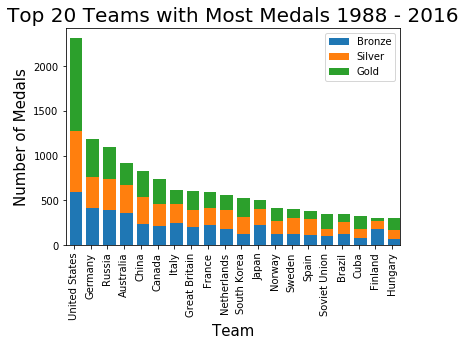

In [152]:
#Question 1:  What are the top 20 teams with the most medals?
groups_medals = merge.groupby('Team').agg({'Gold':'sum', 
                        'Silver':'sum', 
                       'Bronze':'sum',
                         'Total_Medals':'sum'}).nlargest(20, 'Total_Medals')

medals_total = pd.DataFrame(groups_medals, columns = ['Bronze', 'Silver', 'Gold']) 

ax = medals_total.plot(kind='bar',stacked=True,legend=True)

plt.title('Top 20 Teams with Most Medals 1988 - 2016', fontsize=20)
plt.ylabel('Number of Medals', fontsize=15)
plt.xlabel('Team', fontsize=15)

for container in ax.containers:
    plt.setp(container, width=.75)

plt.show()

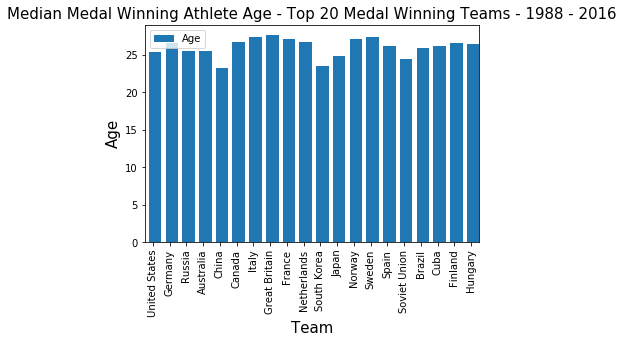

In [153]:
#Question 2: What is the median age for the medal winning athletes 1988 - 2016? 
merge_age = merge[merge["Total_Medals"]!=0]
groups_age = merge_age.groupby('Team').agg({'Age':'mean',
                         'Total_Medals':'sum'}).nlargest(20, 'Total_Medals')

medals_age = pd.DataFrame(groups_age, columns = ['Age']) 

ax = medals_age.plot(kind='bar',stacked=True,legend=True)

plt.title('Median Medal Winning Athlete Age - Top 20 Medal Winning Teams - 1988 - 2016', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xlabel('Team', fontsize=15)

for container in ax.containers:
    plt.setp(container, width=.75)

plt.show()

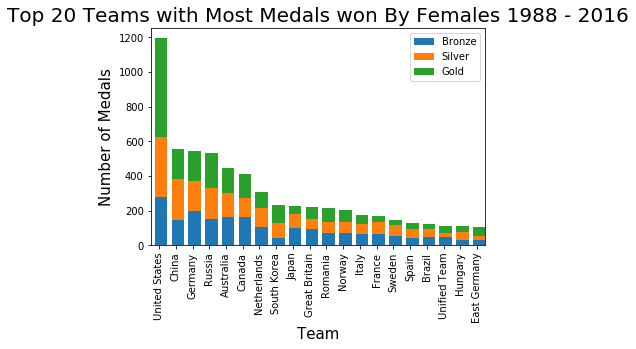

In [154]:
#Question 3: What are the top 20 teams with the most medals won by females?
merge_female = merge[merge["Sex"]=='F']
groups_female = merge_female.groupby('Team').agg({'Gold':'sum', 
                        'Silver':'sum', 
                       'Bronze':'sum',
                         'Total_Medals':'sum'}).nlargest(20, 'Total_Medals')

medals_female = pd.DataFrame(groups_female, columns = ['Bronze', 'Silver', 'Gold']) 

ax = medals_female.plot(kind='bar',stacked=True,legend=True)

plt.title('Top 20 Teams with Most Medals won By Females 1988 - 2016', fontsize=20)
plt.ylabel('Number of Medals', fontsize=15)
plt.xlabel('Team', fontsize=15)

for container in ax.containers:
    plt.setp(container, width=.75)

plt.show()

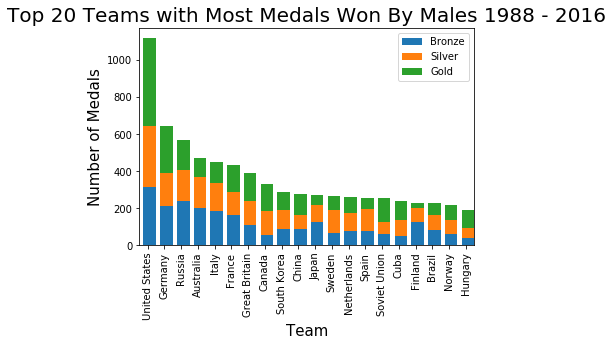

In [155]:
#Question 4: What are the top 20 teams with the most medals won by males 1988 - 2016?
#Note that the US comes out on top by an extreme margin regardless of male or female ahtletes
merge_male = merge[merge["Sex"]=='M']
groups_male = merge_male.groupby('Team').agg({'Gold':'sum', 
                        'Silver':'sum', 
                       'Bronze':'sum',
                         'Total_Medals':'sum'}).nlargest(20, 'Total_Medals')

medals_male = pd.DataFrame(groups_male, columns = ['Bronze', 'Silver', 'Gold']) 

ax = medals_male.plot(kind='bar',stacked=True,legend=True)

plt.title('Top 20 Teams with Most Medals Won By Males 1988 - 2016', fontsize=20)
plt.ylabel('Number of Medals', fontsize=15)
plt.xlabel('Team', fontsize=15)

for container in ax.containers:
    plt.setp(container, width=.75)

plt.show()

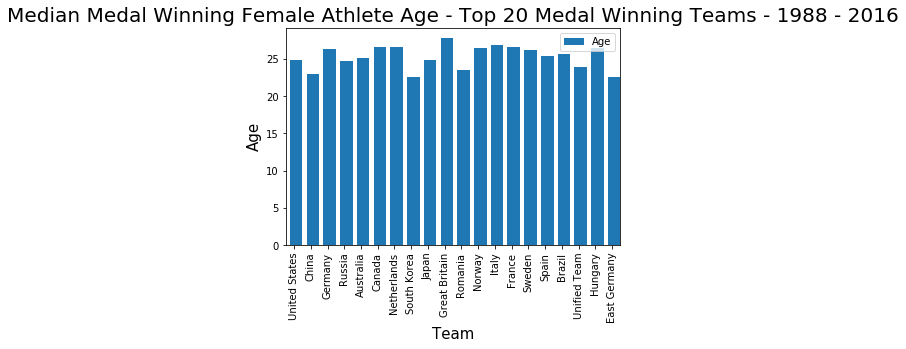

In [156]:
#Question 5: What is the median age for the medal winning female athletes 1988 - 2016? 
merge_female_age = merge[(merge["Sex"]=='F')&(merge['Total_Medals']!=0)]
groups_female_age = merge_female_age.groupby('Team').agg({'Age':'mean',
                         'Total_Medals':'sum'}).nlargest(20, 'Total_Medals')

medals_female_age = pd.DataFrame(groups_female_age, columns = ['Age'])

ax = medals_female_age.plot(kind='bar',stacked=True,legend=True)

plt.title('Median Medal Winning Female Athlete Age - Top 20 Medal Winning Teams - 1988 - 2016', fontsize=20)
plt.ylabel('Age', fontsize=15)
plt.xlabel('Team', fontsize=15)

for container in ax.containers:
    plt.setp(container, width=.75)

plt.show()

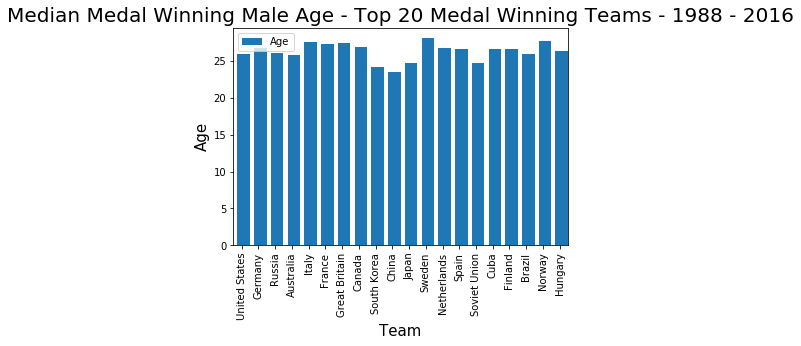

In [157]:
#Question 6. What is the median age for the medal winning male athletes 1988 - 2016? 
#Since the majority of the athletes are in their 20s, the visual results aren't greatly meaningful although
# you can see that some teams average in the lower 20 while others such as Great Briatin are higher.
merge_male_age = merge[(merge["Sex"]=='M')&(merge['Total_Medals']!=0)]
groups_male_age = merge_male_age.groupby('Team').agg({'Age':'mean',
                         'Total_Medals':'sum'}).nlargest(20, 'Total_Medals')

medals_male_age = pd.DataFrame(groups_male_age, columns = ['Age'])

ax = medals_male_age.plot(kind='bar',stacked=True,legend=True)

plt.title('Median Medal Winning Male Age - Top 20 Medal Winning Teams - 1988 - 2016', fontsize=20)
plt.ylabel('Age', fontsize=15)
plt.xlabel('Team', fontsize=15)

for container in ax.containers:
    plt.setp(container, width=.75)

plt.show()

In [158]:
#To get the total medals won by country alongside the unique number of athletes winning them
unique_total = merge.groupby('Team').agg({'ID': pd.Series.nunique, 'Total_Medals':'sum'})
unique_total.rename(columns={'ID':'Unique_Athletes'}, inplace=True)
unique_total

,Unique_Athletes,Total_Medals
Team,,
Afghanistan,20,2
Albania,40,0
Algeria,297,15
American Samoa,29,0
Andorra,49,0
Angola,152,0
Antigua and Barbuda,52,0
Argentina,869,196
Argentina-1,8,0


In [159]:
#PREDICTIVE ANALYTICS - Build an OLS regression to identify if the number of medals won increases
   #with the number of UNIQUE athletes
    #Unique athletes were chosen for this exercise as I thought about the Michael Phelps scenario where 
    #he won five gold medals and one silver in 2016 and wanted to see if there was an impact of the number of 
    #individuals participating on a team.  We could have one Michael Phelps or 6 individuals who could have brought 
    #home the same number of medals.
model = smf.ols(formula='Total_Medals ~ Unique_Athletes', data=unique_total)
results = model.fit()
print(results.params)
print(results.summary())

#R-squared:  The R-squared of .848 indicates that almost 85% of the data fits the model indicating that 
#there it is very likely that relationship between the number of unique athletes and the number of medals won.


Intercept         -20.215765
Unique_Athletes     0.373274
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Total_Medals   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2109.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          1.04e-156
Time:                        22:04:23   Log-Likelihood:                -2161.3
No. Observations:                 380   AIC:                             4327.
Df Residuals:                     378   BIC:                             4334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Text(0.5, 1, '1988 - 2016:  Do Total Medals Increase With Total Number of Unique Athletes?')

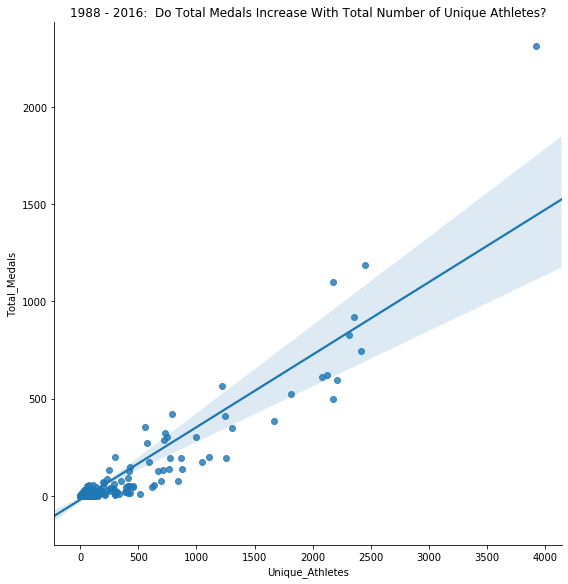

In [160]:
#PREDICTIVE ANALYTICS - Plot the number of Unique athletes and the total medals won by Team
# Based upon the plot below, it does appear as thought the total medals may increase with the increase of unique
#athletes
sns.lmplot(x='Unique_Athletes', y='Total_Medals', data=unique_total, height=8, aspect=1)
plt.title('1988 - 2016:  Do Total Medals Increase With Total Number of Unique Athletes?')